# Vibration in Recycle Gas Compressor of a Diesel Hydrotreater Unit

## This notebook is under development!

The data available to study the vibration in the recycle gas compressor C-28501 is given in three *.csv files. Each file comprises a different timestamp, as given below, and I'm using the largest one as the train dataset:

| Filename       | Timestamp (dd/mm hh:mm)   |
|--------|-------|---------------|-----------|
|   test_data1   | 08/02 12:00 -> 17/02 09:10|
|   test_data2   |  17/02 20:35 -> 04/03 16:00|
|   train_data3  | 08/03 16:35 -> 02/04 06:00|

In [1]:
# IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Acquiring Data ###

# Reading the csv file, separator is ';'
# 'Bad Input' occurs when the instrument fails to measure or register the value.
# 'Tag not found' occurs when there is some problem with PI Process server
test_data = pd.read_csv('test_data.csv', sep=';', na_values=['Bad Input', 'Tag not found'])
train_data = pd.read_csv('train_data.csv', sep=';', na_values=['Bad Input', 'Tag not found'])

raw_datalist = [test_data, train_data]

for dataset in raw_datalist:
    dataset.drop(['DATE'], axis=1, inplace=True)
    dataset.dropna(axis=0, how='all', inplace=True)
    dataset.dropna(axis=1, how='all', inplace=True)
    dataset.astype(dtype='float64')

# Pre-visuzalization of test_data
test_data.head()

/home/floggio/Desktop/coding/learning/DataScience/DSVenv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FIC28501,TI28601,FIC28502,TI28602,FIC28503,TI28603,PIC28730,FIC28505,FIC28505O,TI28531,...,PI28899,PI28900,PI28903,PI28897,FI28572,FI28573,TI5683654,XI28551,VXI28502,VYI28502
0,1353.858643,89.764397,0.0,26.777506,2603.414063,187.179260,6.512330,3986.861572,38.310753,155.165909,...,0.076317,0.061816,1.077371,1.152735,1.095942,1.342275,24.0,8575.84668,27.858067,33.077297
1,1357.570068,89.759613,0.0,26.773035,2599.035889,187.271439,6.504811,3988.629395,38.265812,155.189606,...,0.075076,0.061816,1.074598,1.156448,1.095942,1.345546,24.0,0.00000,0.000000,0.000000
2,1362.856079,89.754829,0.0,26.768564,2599.372803,187.363632,6.509819,3992.241455,38.215126,155.213303,...,0.074974,0.061816,1.075792,1.155154,1.095942,1.348817,24.0,0.00000,0.000000,0.000000
3,1363.332275,89.750053,0.0,26.764093,2599.709473,187.435593,6.514335,3995.853516,38.250267,155.236984,...,0.076951,0.061816,1.078469,1.154514,1.095942,1.352088,24.0,0.00000,0.000000,0.000000
4,1359.964722,89.745270,0.0,26.759623,2600.046143,187.471466,6.517665,3999.465576,38.312637,155.260681,...,0.076317,0.062419,1.077359,1.151207,1.095942,1.355359,24.0,0.00000,0.000000,0.000000


In [2]:
# Pre-visuzalization of train_data
train_data.head()

,FIC28501,TI28601,FIC28502,TI28602,FIC28503,TI28603,PIC28730,FIC28505,FIC28505O,TI28531,...,PI28900,PI28903,PI28897,FI28572,FI28573,TI5683654,XI28551,VXI28502,VYI28502,VIB_LA_AVG
0,218.6138,27.07687,0.0,28.05599,149.44453,29.56839,6.51331,0.0,0.0,51.15397,...,0.06986,1.17335,1.24684,1.13050,0.84554,32.0,1492.42932,6.45947,7.32420,6.89183
1,218.6138,27.09085,0.0,28.06234,147.80458,29.55710,6.51370,0.0,0.0,51.14632,...,0.06906,1.18245,1.25882,1.14011,0.86987,32.0,1514.76147,6.45894,7.29343,6.87618
2,218.6138,27.10483,0.0,28.06870,146.16463,29.54581,6.51372,0.0,0.0,51.13866,...,0.06945,1.18466,1.25832,1.14972,0.89420,32.0,1537.09351,6.45841,7.26266,6.86053
3,218.6138,27.11405,0.0,28.07505,145.67049,29.53451,6.51360,0.0,0.0,51.13101,...,0.06945,1.18201,1.25444,1.15933,0.91853,32.0,1559.42554,6.45788,7.23189,6.84488
4,218.6138,27.11896,0.0,28.08140,145.36546,29.52322,6.50876,0.0,0.0,51.12336,...,0.06833,1.15988,1.23736,1.16895,0.94286,32.0,2906.74731,6.45735,7.75481,7.10608


In [3]:
# There is a different number of features in each dataset
# Let's check which ones are different in them

print('Features in train_data not present in test_data:')
for feature in list(train_data):
    if feature not in list(test_data):
        print(feature)
        
print('\nFeatures in test_data not present in train_data:')
for feature in list(test_data):
    if feature not in list(train_data):
        print(feature)

Features in train_data not present in test_data:
TI28693.1
TI28777
VIB_LA_AVG

Features in test_data not present in train_data:


In [4]:
# All features in test_data are in train_data but there are three
# features in train_data not present test_data and I'm removing them

features_to_drop = []
for feature in list(train_data):
    if feature not in list(test_data):
        features_to_drop.append(feature)

train_data.drop(features_to_drop, axis=1, inplace=True)
        
print('Are features the same in test and train dataset?', list(test_data) == list(train_data))

Are features the same in test and train dataset? True


## Cleaning Data

The fisrt step is to reduce data dimension by removing duplicate features
and combine features that are strogly related or are redundant.

As I'm familiar with the plant process and the compressor operation,
I've came up with some features that are related according to its
position in the process.

### Temperature Features

Feed Temperature features
These features are related with temperature of feed components (heavy and light diesel,
light cycle oil, coker gasoil, mixture in the feed vessel):
- 'TI28531','TI28601', 'TI28602', 'TI28603','TI28606'

Features related with reactors temperatures (inlet, outlet, reactor beds, etc...):
- 'TI28693', 'TI28697', 'TI28696', 'TI28694', 'TI28691', 'TI28517', 'TI28612', 'TI28630', 'TI28510', 'TIC28511','TIC28530', 'TIC28650', 'TIC28515', 'TIC28680', 'TI28699', 'TI28700'

Differential temperaturs in reactor beds:
- 'TDI28640', 'TDI28530', 'TDI28650', 'TDI28670', 'TDI28680'

Bushing temperatures:
- 'TI28795', 'TI28796', 'TI28797', 'TI28798'

Lub Oil temperature fatures:
- 'TI28787', 'TI28877'


### Flow Features
Compressor discharge flow (reduntant)
- 'FI28507A', 'FI28507B'

Gas flow for reactors (redundant)
- 'FI28508A', 'FI28508B', 'FI28508C'

Reactor quench flows
- 'FIC28511', 'FIC28512', 'FIC28513', 'FIC28514'

Seal gas flow
- 'FI28572', 'FI28573'

### Pressure Features
Oil pressure features
- 'PI28611', 'PI28612', 'PI28903', 'PI28897'

First and second seal pressures
- 'PI28914A', 'PI28914B'
- 'PI28899', 'PI28900'

### Level Features
High Pressure Separator Vessel
- 'LI28508', 'LI28509A', 'LI28509B'

In [5]:
# ### TEMPERATURE FEATURES ###

# # Feed temperature correlation
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['TI28531','TI28601', 'TI28602','TI28603','TI28606']].corr(), square=True);

# # Reactor temperature correlation
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['TI28693', 'TI28697', 'TI28696', 'TI28694', 
#                         'TI28691', 'TI28517', 'TI28612', 'TI28630', 
#                         'TI28510', 'TIC28511','TIC28530','TIC28650',
#                         'TIC28515', 'TIC28680', 'TI28699', 'TI28700']].corr(), square=True);

# # Differential temperature in reactors correlation
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['TDI28640', 'TDI28530', 'TDI28650', 'TDI28670', 'TDI28680']].corr(), square=True);

# # Bushing temperature correlation
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['TI28795', 'TI28796', 'TI28797', 'TI28798']].corr(), square=True);

# # Oil temperature correlation
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['TI28787', 'TI28877', 'TI5683654']].corr(), square=True)

In [6]:
# ### FLOW FEATURES ###

# # Discharge flow features
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['FI28507A', 'FI28507B']].corr(), square=True);

# # Gas flow for reactors
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['FI28508A', 'FI28508B', 'FI28508C']].corr(), square=True);

# # Reactor quench gas flow
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['FIC28511', 'FIC28512', 'FIC28513', 'FIC28514']].corr(), square=True);

# # Seal gas flow
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['FI28572', 'FI28573']].corr(), square=True);

# # Reactor feed flow
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['FIC28505', 'FIC28505O']].corr(), square=True);

In [7]:
# ### PRESSURE FEATURES ###

# # Reactor pressure features
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['PI28513', 'PI28515', 'PI28516', 'PI28523', 'PIC28526A',
#                         'PIC28526B', 'PI28527', 'PI28506', 'PI28528']].corr(), square=True);

# # Lub oil pressure
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['PI28611', 'PI28612', 'PI28903', 'PI28897']].corr(), square=True);

# # First seal pressure
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['PI28914A', 'PI28914B']].corr(), square=True);

# # Second seal pressure
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['PI28899', 'PI28900']].corr(), square=True);

In [8]:
# ### LEVEL FEATURE ###

# # High Pressure Separator Vessel
# f, ax = plt.subplots(figsize=(8, 4))
# sns.heatmap(train_data[['LI28508', 'LI28509A', 'LI28509B']].corr(), square=True);

In [9]:
### Cleaning Data ###

# Given the Pearson correlation heatmaps above the features below will not be used in their groups:
# TI28602 (Feed temperature group)
# TDI28670 (Reactor differential temperature group)

# The following function will be used to join the rest of the features and clean the datasets

def join_features(dataset):
    # Feed temperature features
    feed_temp_feat = ['TI28531','TI28601', 'TI28603','TI28606']
    FEED_T = dataset[feed_temp_feat].mean(axis=1)
    
    # Reaction temperature features
    react_temp_feat = ['TI28693', 'TI28697', 'TI28696', 'TI28694', 'TI28691', 
                       'TI28517', 'TI28612', 'TI28630', 'TI28510', 'TIC28511',
                       'TIC28530', 'TIC28650', 'TIC28515', 'TIC28680', 'TI28699',
                       'TI28700']
    REACT_T = dataset[react_temp_feat].mean(axis=1)
    
    # Reactor Differential temperature features
    diff_temp_feat = ['TDI28640', 'TDI28530', 'TDI28650', 'TDI28680']
    DIFF_REACT_T = dataset[diff_temp_feat].mean(axis=1)
    
    # Bushing (mancal) temperature mean
    bushing_temp_feat = ['TI28795', 'TI28796', 'TI28797', 'TI28798']
    BUSHING_T = dataset[bushing_temp_feat].mean(axis=1)
    
    oil_temp_feat = ['TI28787', 'TI28877', 'TI5683654', 'TI28707']
    OIL_T = dataset[oil_temp_feat].mean(axis=1)
    
    # Compressor discharge flow features (same point)
    fi507_feat = ['FI28507A', 'FI28507B', 'FI28507X']
    FI28507 = dataset[fi507_feat].mean(axis=1)
    
    # Recycle gas for reactors features mean (same point)
    fi508_feat = ['FI28508A', 'FI28508B', 'FI28508C']
    FI28508 = dataset[fi508_feat].mean(axis=1)
    
    # Reactor quench flows sum
    quench_feat = ['FIC28511', 'FIC28512', 'FIC28513', 'FIC28514']
    QUENCH = dataset[quench_feat].sum(axis=1)
    
    # Seal gas flows sum
    seal_flow_feat = ['FI28572', 'FI28573']
    SEAL_FLOW = dataset[seal_flow_feat].sum(axis=1)
    
    # Reactor feed flow
    reactor_feed_feat = ['FIC28505', 'FIC28505O']
    REACTOR_FEED = dataset[reactor_feed_feat].mean(axis=1)
    
    # Reactor pressure features
    react_pressure_feat = ['PI28513', 'PI28515', 'PI28516', 'PI28523', 'PIC28526A',
                          'PIC28526B', 'PI28527', 'PI28506', 'PI28528']
    REACTION_P = dataset[react_pressure_feat].mean(axis=1)
    
    # Lub oil pressure
    oil_pressure_feat = ['PI28611', 'PI28612', 'PI28903', 'PI28897', 'PI28606']
    OIL_LUB_P = dataset[oil_pressure_feat].mean(axis=1)
    
    # First and second seals pressure
    first_seal_feat = ['PI28914A', 'PI28914B']
    FIRST_SEAL_P = dataset[first_seal_feat].mean(axis=1)
    
    second_seal_feat = ['PI28899', 'PI28900']
    SECOND_SEAL_P = dataset[second_seal_feat].mean(axis=1)
    
    # Separator vessel level (same point)
    li508_feat = ['LI28508', 'LI28509A', 'LI28509B']
    LI28508 = dataset[li508_feat].mean(axis=1)
    
    new_features = [FI28507, FI28508, QUENCH, SEAL_FLOW, REACTION_P,
                    OIL_LUB_P, FIRST_SEAL_P, SECOND_SEAL_P, LI28508, FEED_T,
                    REACT_T, DIFF_REACT_T, BUSHING_T, OIL_T, REACTOR_FEED]
    
    new_features_list = ['FI28507', 'FI28508', 'QUENCH', 'SEAL_FLOW', 'REACTION_P', 
                         'OIL_LUB_P', 'FIRST_SEAL_P', 'SECOND_SEAL_P', 'LI28508', 'FEED_T',
                          'REACT_T', 'DIFF_REACT_T', 'BUSHING_T', 'OIL_T', 'REACTOR_FEED']
    
    for i, feature in enumerate(new_features_list):
        dataset[feature] = new_features[i]
    
    features_to_drop = [fi507_feat, fi508_feat, quench_feat, seal_flow_feat, react_pressure_feat,
                        oil_pressure_feat, first_seal_feat, second_seal_feat, li508_feat, feed_temp_feat,
                        react_temp_feat, diff_temp_feat, bushing_temp_feat, oil_temp_feat, reactor_feed_feat]
    
    for feature_list in features_to_drop:
        dataset.drop(feature_list, axis=1, inplace=True)
        
    # Filling NA with the previous valor in the row
    dataset.fillna(method='ffill', inplace=True)  



for i, dataset in enumerate([train_data, test_data]):
    join_features(dataset)
    print('data'+str(i+1)+ ' shape = ', dataset.shape)

data1 shape =  (7074, 41)
data2 shape =  (3258, 41)


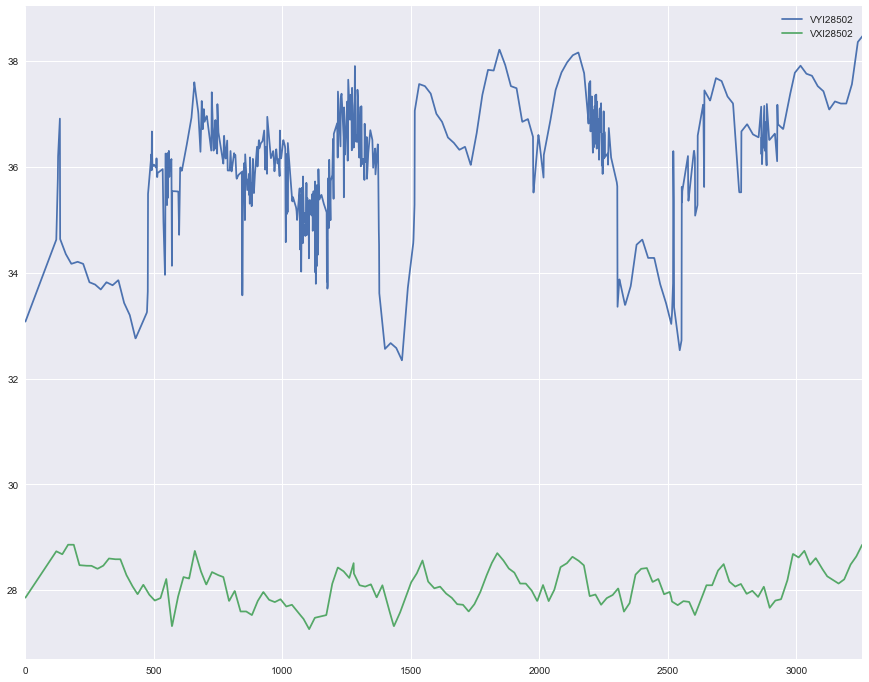

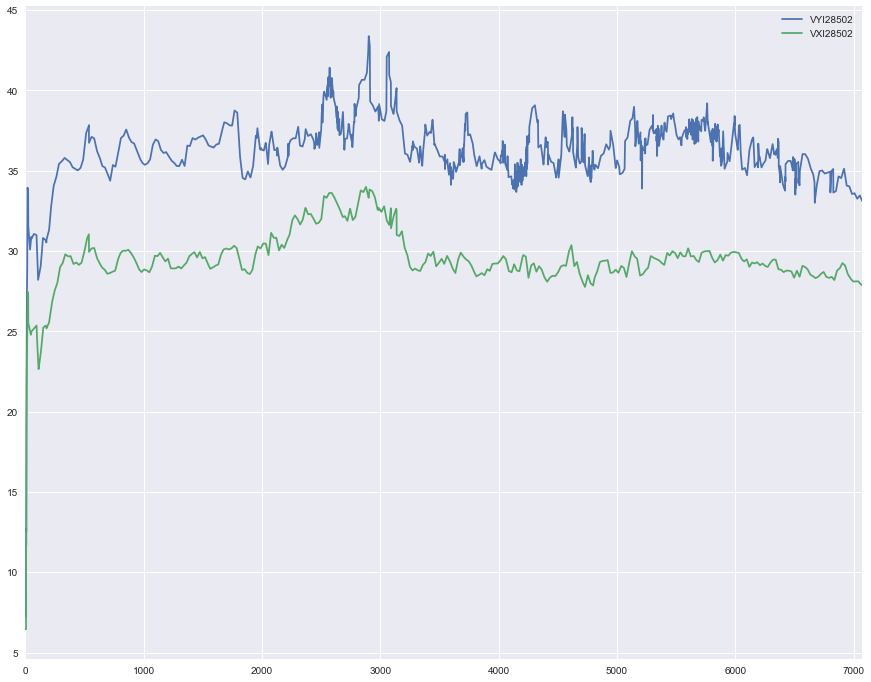

In [10]:
test_data = test_data[test_data.VXI28502 > 25]

test_data[['VYI28502', 'VXI28502']].plot(figsize=(15,12))
train_data[['VYI28502', 'VXI28502']].plot(figsize=(15,12))

In [11]:
# Normalizing data
train_norm = train_data.copy()
test_norm = test_data.copy()

from sklearn.preprocessing import StandardScaler

train_norm = pd.DataFrame(StandardScaler().fit_transform(train_norm), columns=list(train_norm))
test_norm = pd.DataFrame(StandardScaler().fit_transform(test_norm), columns=list(test_norm))

train_norm.head()

,FIC28501,FIC28502,TI28602,FIC28503,PIC28730,PI28505,FFI28505,FIC28544O,TDI28670,FIC28525,...,REACTION_P,OIL_LUB_P,FIRST_SEAL_P,SECOND_SEAL_P,FEED_T,REACT_T,DIFF_REACT_T,BUSHING_T,OIL_T,REACTOR_FEED
0,-4.533341,-0.028088,-0.867909,-4.865111,0.011109,-14.083218,4.705,-3.489828,-3.851393,-3.174789,...,-16.227564,4.534306,-1.429768,0.013665,-5.186820,-7.102871,10.219452,-16.768085,-1.124372,-9.945723
1,-4.533341,-0.028088,-0.865471,-4.868575,0.015446,-14.083248,4.705,-3.489828,-3.809510,-3.175277,...,-16.073325,4.804102,-1.596200,-0.256488,-5.177214,-7.137845,10.567402,-16.625361,-1.174488,-9.945723
2,-4.533341,-0.028088,-0.863029,-4.872039,0.015668,-14.083279,4.705,-3.489828,-3.767633,-3.175358,...,-15.849008,4.687447,-1.506743,-0.186771,-5.167608,-7.168070,10.915351,-16.482640,-1.219683,-9.945723
3,-4.533341,-0.028088,-0.860591,-4.873083,0.014334,-14.083309,4.705,-3.489828,-3.725750,-3.174466,...,-15.538283,4.478018,-1.417286,-0.082196,-5.158067,-7.196287,11.263300,-16.339917,-1.241598,-9.945723
4,-4.533341,-0.028088,-0.858154,-4.873727,-0.039489,-14.083339,4.705,-3.489828,-3.683873,-3.173111,...,-15.220956,3.700433,-1.327829,-0.331651,-5.148585,-7.229411,11.466143,-14.346443,-1.271885,-9.945723


PIC28530        -0.462948
FFI28505        -0.456855
TI28883         -0.430466
OIL_LUB_P       -0.281558
SEAL_FLOW       -0.254895
FI28508         -0.209400
PIC28526BO      -0.197630
PI28567         -0.171935
PI28531         -0.166117
85GPPMMC1       -0.158452
FIC28607        -0.139828
TDI28670        -0.120242
FIRST_SEAL_P    -0.083338
PIC28730        -0.006868
FIC28502         0.000917
PI28617A         0.044264
SECOND_SEAL_P    0.139117
DIFF_REACT_T     0.183052
PI28505          0.191812
FIC28544O        0.245064
PIC28526AO       0.271328
PI28895          0.360144
OIL_T            0.383811
FEED_T           0.394629
FIC28525         0.395128
FI28507          0.424338
TI28602          0.433092
FIC28501         0.494663
TI28705          0.504613
XI28551          0.524947
QUENCH           0.531563
FIC28503         0.535101
REACTION_P       0.544782
REACT_T          0.557904
BUSHING_T        0.566676
TI28522          0.600902
FI28509          0.616599
REACTOR_FEED     0.668047
FI28570     

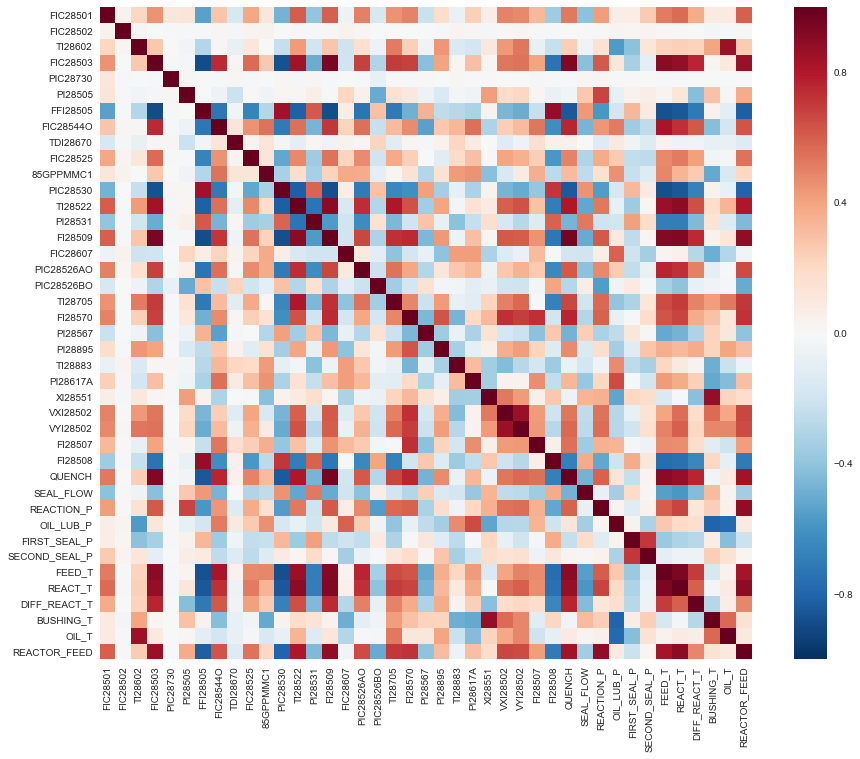

In [12]:
def get_corrmat(dataset, plot_size):
    corrmat = dataset.corr()
    f, ax = plt.subplots(figsize=plot_size)
    sns.heatmap(corrmat, square=True);
    print(corrmat.sort_values('VXI28502')['VXI28502'])

get_corrmat(train_norm, (15,12))

In [13]:
train_filtered = train_norm.copy()
train_filtered_corrmat = train_filtered.corr()

test_filtered = test_norm.copy()
    
for feature in list(train_filtered_corrmat):
    if abs(train_filtered_corrmat.loc['VXI28502'][feature]) < 0.3:
        train_filtered.drop([feature], axis=1, inplace=True)
        test_filtered.drop([feature], axis=1, inplace=True)
        
print(train_filtered.shape)
print(test_filtered.shape)

(7074, 23)
(3137, 23)


INV_CORR             -0.679515
PIC28530             -0.462948
FFI28505             -0.456855
TI28883              -0.430466
PI28895               0.360144
OIL_T                 0.383811
FEED_T                0.394629
FIC28525              0.395128
FI28507               0.424338
TI28602               0.433092
FIC28501              0.494663
TI28705               0.504613
XI28551               0.524947
QUENCH                0.531563
FIC28503              0.535101
BUSHING_OIL_T         0.535899
REACTION_P            0.544782
REACT_T               0.557904
BUSHING_T             0.566676
TI28522               0.600902
UNIT_FEED             0.605334
FI28509               0.616599
REACTOR_CONDITIONS    0.632636
REACTOR_FEED          0.668047
FI28570               0.727757
COMPRESSOR_POWER      0.769800
VYI28502              0.859695
VXI28502              1.000000
Name: VXI28502, dtype: float64


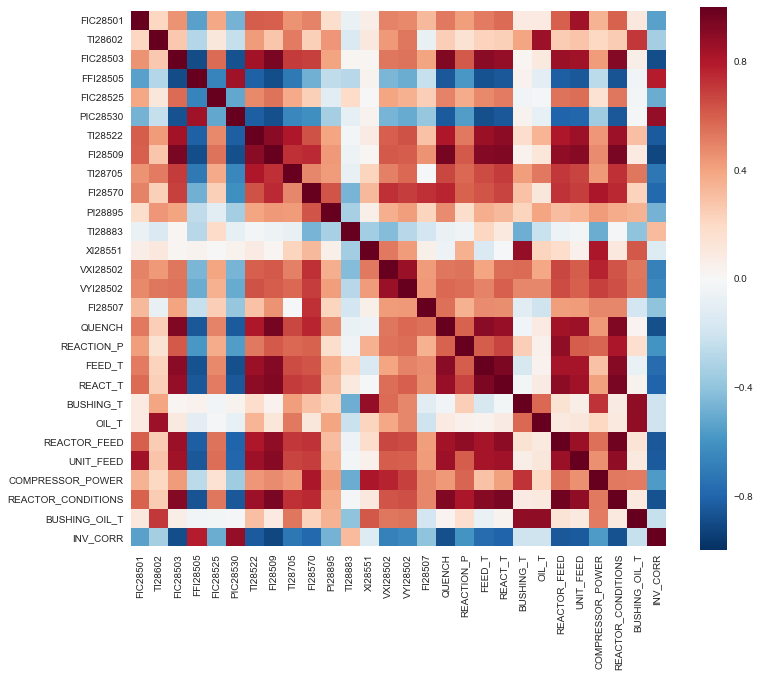

In [14]:
## Creating Features ###

## Now let's try to come up with some new features
train = train_filtered.copy()

# Unit Feed
train['UNIT_FEED'] = train_norm[['FIC28501', 'FIC28503']].mean(axis=1)

# Compressor Power (Steam flow and rotation of compressor are related)
train['COMPRESSOR_POWER'] = train_norm[['FI28570', 'XI28551']].mean(axis=1)

# Quench flow, reactor feed flow, reactor pressure, makeup flow and reactor temperature
train['REACTOR_CONDITIONS'] = train_filtered[['REACT_T', 'QUENCH', 'REACTOR_FEED', 
                                              'REACTION_P', 'FI28509']].mean(axis=1)

# Bushing and Oil temperatures
train['BUSHING_OIL_T'] = train_filtered[['BUSHING_T', 'OIL_T']].mean(axis=1)
    
# Joining negative correlated features
train['INV_CORR'] = train_filtered[['FFI28505', 'PIC28530', 'TI28883']].mean(axis=1)
    
get_corrmat(train, (12, 10))

TI28883              -0.430466
BUSHING_OIL_T         0.535899
REACTOR_CONDITIONS    0.632636
COMPRESSOR_POWER      0.769800
VXI28502              1.000000
Name: VXI28502, dtype: float64

test shape (7074, 5)
train shape (3137, 5)

Coefficients:  [-0.15176113  0.40910045  0.46271477  0.29183962] 

Mean squared error: 0.59
Variance score: 0.41


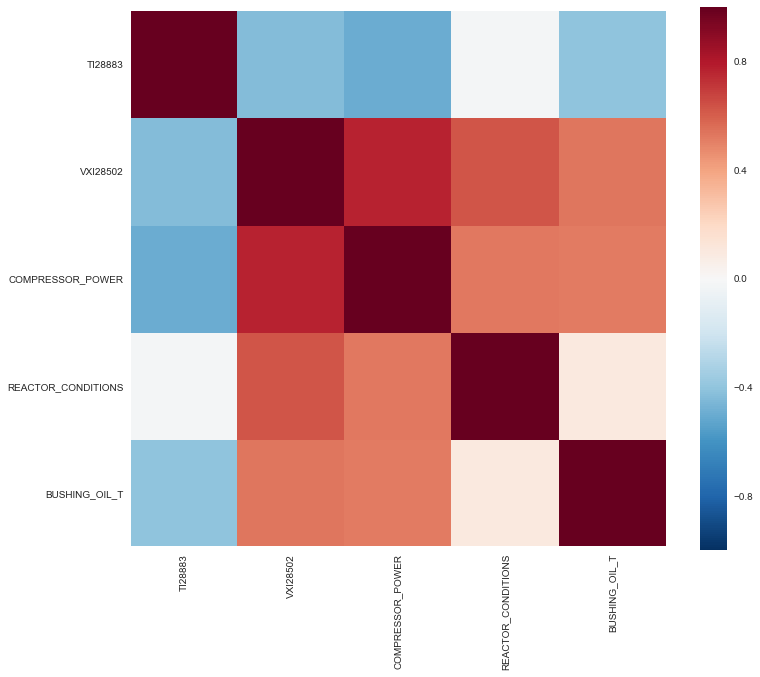

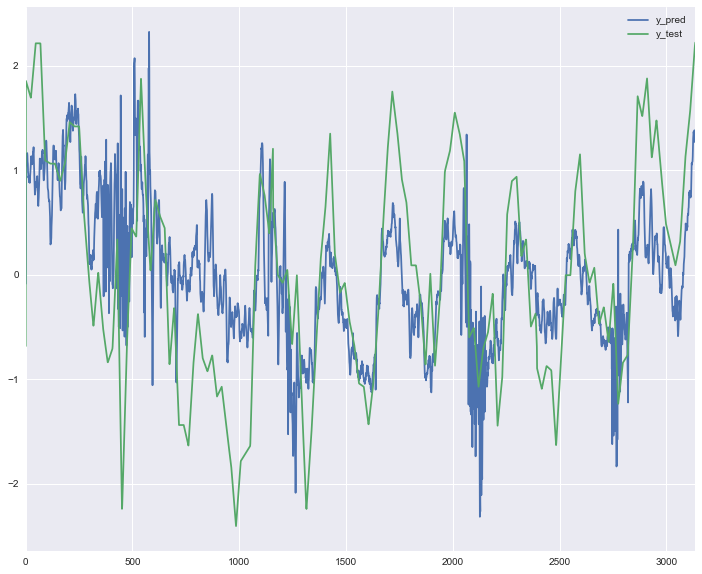

In [19]:
final_train = train.drop(['FIC28525','XI28551', 'FIC28501', 'FIC28503', 'PIC28530', 'VYI28502',
                          'QUENCH', 'BUSHING_T', 'OIL_T', 'REACTION_P', 'REACT_T', 'REACTOR_FEED',
                          'PI28895', 'FI28507', 'TI28602', 'TI28705', 'TI28522', 'FI28570', 'FEED_T',
                          'FFI28505', 'FI28509', 'INV_CORR', 'UNIT_FEED'], axis=1)

get_corrmat(final_train, (12, 10))

final_test = test_filtered.copy()

# Unit Feed
final_test['UNIT_FEED'] = test_filtered[['FIC28501', 'FIC28503']].mean(axis=1)

# Compressor Power (Steam flow and rotation of compressor are related)
final_test['COMPRESSOR_POWER'] = test_norm[['FI28570', 'XI28551']].mean(axis=1)

# Quench flow, reactor feed flow, reactor pressure, makeup flow and reactor temperature
final_test['REACTOR_CONDITIONS'] = test_filtered[['REACT_T', 'QUENCH', 'REACTOR_FEED', 
                                              'REACTION_P', 'FI28509']].mean(axis=1)

# Bushing and Oil temperatures
final_test['BUSHING_OIL_T'] = test_filtered[['BUSHING_T', 'OIL_T']].mean(axis=1)
    
# Joining negative correlated features
final_test['INV_CORR'] = test_filtered[['FFI28505', 'TI28883', 'PIC28530']].mean(axis=1)


for feature in list(final_test):
    if feature not in list(final_train):
        final_test.drop([feature], axis=1, inplace=True)
        
print('\ntest shape ' + str(final_train.shape))
print('train shape ' + str(final_test.shape) + '\n')


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Preparing dataset for training
y_train = final_train['VXI28502']
X_train = final_train.drop(['VXI28502'], axis=1)

y_test = final_test['VXI28502']
X_test = final_test.drop(['VXI28502'], axis=1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The coefficients
print('Coefficients: ', regr.coef_, '\n')

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
compare_y = pd.DataFrame(data=y_pred, columns=['y_pred'])
compare_y['y_test'] = y_test

compare_y.head()
compare_y.plot(figsize=(12,10))